In [ ]:

from google.colab import files
uploaded = files.upload()

Saving PCOS_data.csv to PCOS_data.csv


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('PCOS_data.csv')

print(f"Original DataFrame Shape: {df.shape}")


Original DataFrame Shape: (541, 45)


In [ ]:
# 1. Clean Column Names

df.columns = df.columns.astype(str).str.strip()
df.columns = df.columns.str.replace(r'[^\w\s]', '', regex=True) # Remove all non-word characters except whitespace
df.columns = df.columns.str.replace(r'\s+', '_', regex=True) # Replace any sequence of whitespace with a single underscore
df.columns = df.columns.str.replace(r'_+', '_', regex=True) # Replace multiple underscores with single underscore
df.columns = df.columns.str.strip('_')

TARGET_COL = 'PCOS_YN'
COERCE_COLS = ['II_betaHCGmIUmL', 'AMHngmL'] # Columns that needed type conversion



In [ ]:
# 2. Drop Identifier and Mostly Null Columns
df = df.drop(columns=['Sl_No', 'Patient_File_No', 'Unnamed_44'], errors='ignore')



In [ ]:
# 3. Handle Mixed Data Types (Object to Numeric)
for col in COERCE_COLS:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
# 4. Handle Missing Values (Imputation)
df['Marraige_Status_Yrs'] = df['Marraige_Status_Yrs'].fillna(df['Marraige_Status_Yrs'].median())
df['Fast_food_YN'] = df['Fast_food_YN'].fillna(df['Fast_food_YN'].mode()[0])
for col in COERCE_COLS:
    df[col] = df[col].fillna(df[col].mean())


In [ ]:
print("\n--- Data Info After Cleaning and Imputation ---")
df.info()

print("\nTarget Variable Distribution (PCOS (Y/N)):")
print(df[TARGET_COL].value_counts().to_markdown(numalign="left", stralign="left"))



--- Data Info After Cleaning and Imputation ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PCOS_YN              541 non-null    int64  
 1   Age_yrs              541 non-null    int64  
 2   Weight_Kg            541 non-null    float64
 3   HeightCm             541 non-null    float64
 4   BMI                  541 non-null    float64
 5   Blood_Group          541 non-null    int64  
 6   Pulse_ratebpm        541 non-null    int64  
 7   RR_breathsmin        541 non-null    int64  
 8   Hbgdl                541 non-null    float64
 9   CycleRI              541 non-null    int64  
 10  Cycle_lengthdays     541 non-null    int64  
 11  Marraige_Status_Yrs  541 non-null    float64
 12  PregnantYN           541 non-null    int64  
 13  No_of_abortions      541 non-null    int64  
 14  I_betaHCGmIUmL       541 non-null    floa

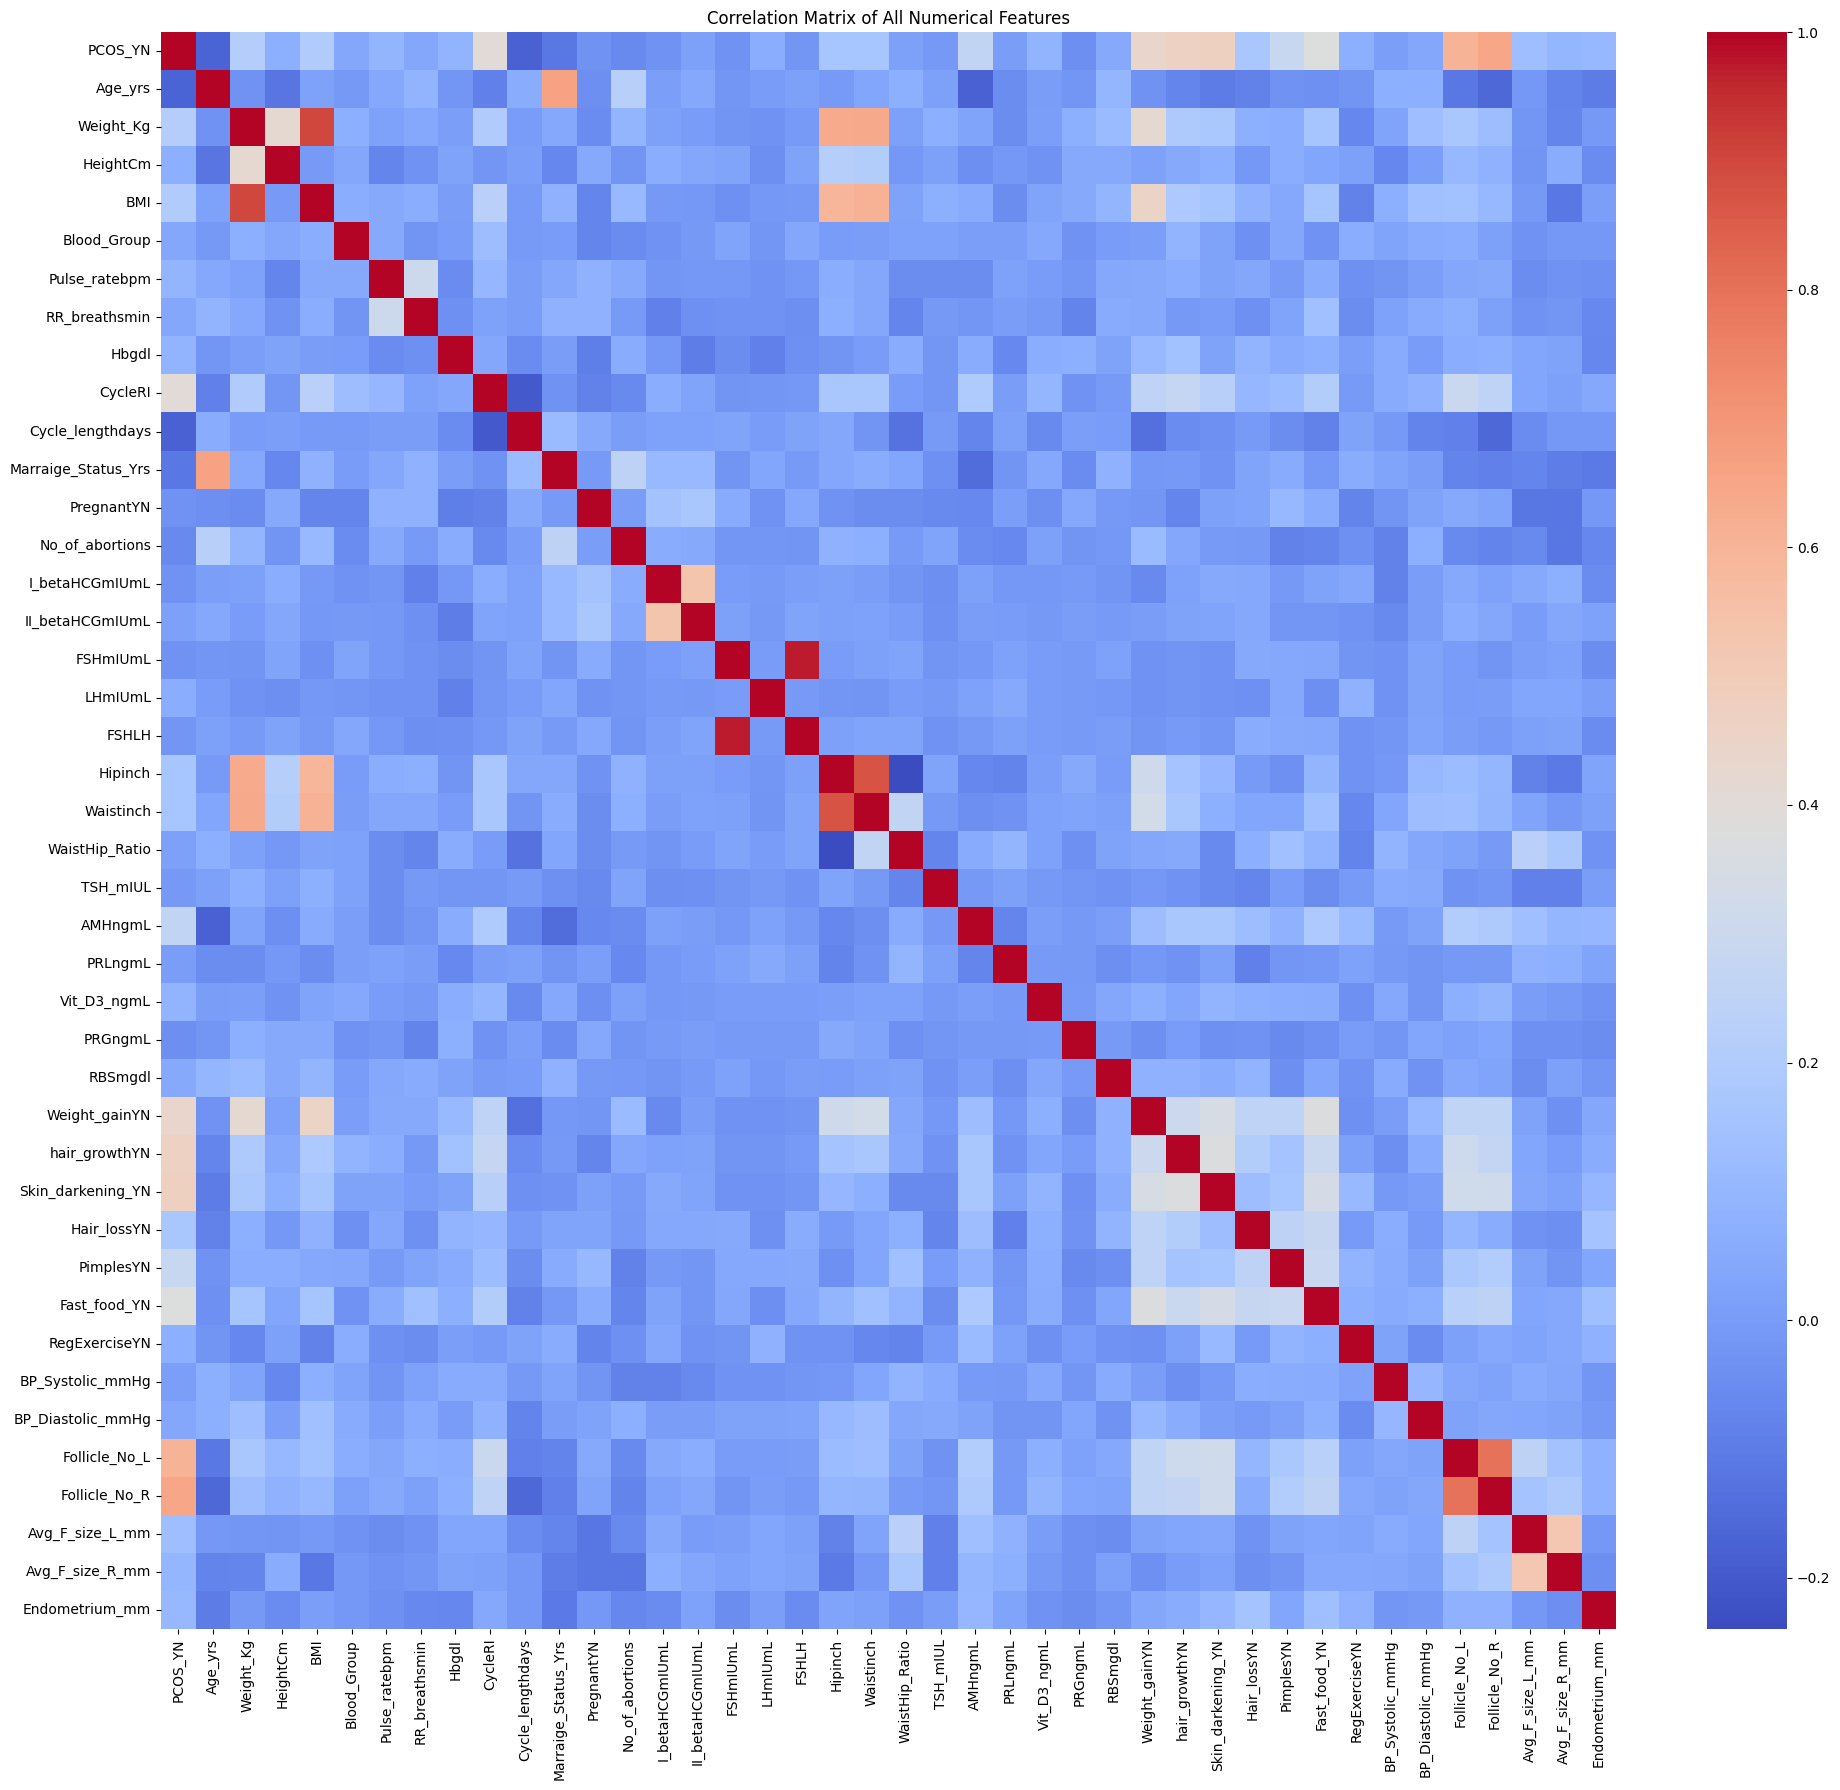

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

TARGET_COL = 'PCOS_YN'

# Feature Correlation Map
plt.figure(figsize=(20, 18))
numerical_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numerical_cols].corr()

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Numerical Features')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1086751345.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pcos_corr.values, y=pcos_corr.index, palette='viridis')


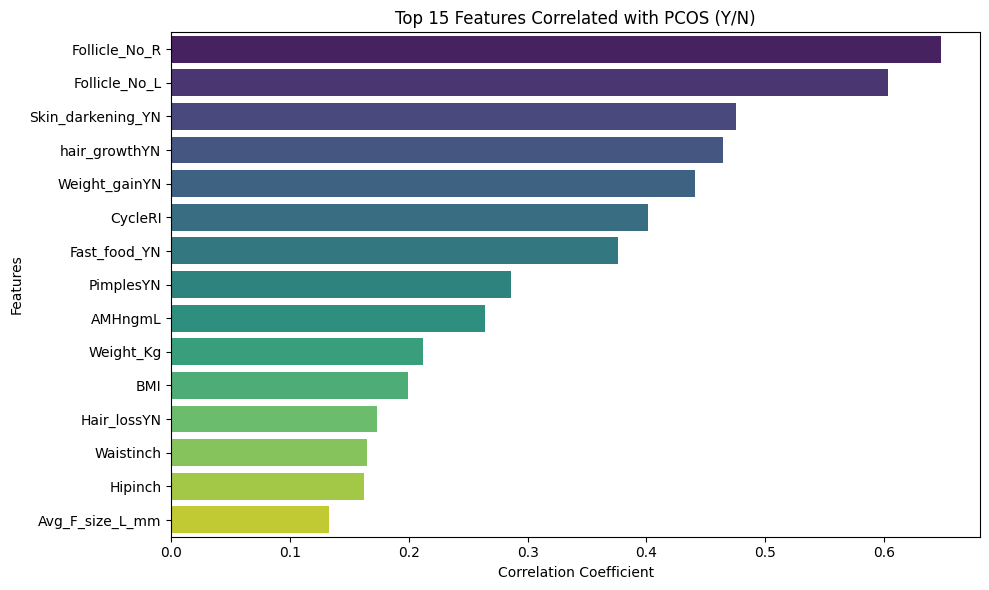


EDA complete. Key predictors include Follicle No (L/R) and hair_growthYN.


In [ ]:
# --- Top 15 features correlated with PCOS ---
pcos_corr = corr_matrix[TARGET_COL].sort_values(ascending=False).iloc[1:16]

plt.figure(figsize=(10, 6))
sns.barplot(x=pcos_corr.values, y=pcos_corr.index, palette='viridis')
plt.title('Top 15 Features Correlated with PCOS (Y/N)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("\nEDA complete. Key predictors include Follicle No (L/R) and hair_growthYN.")

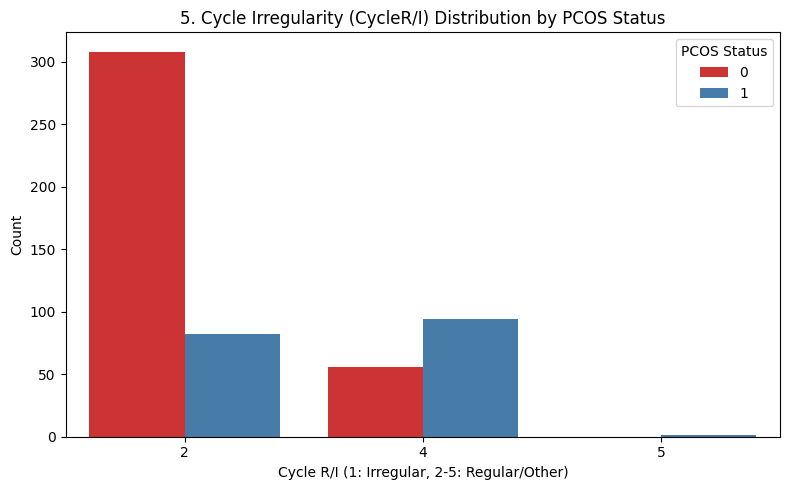

In [ ]:
#Distribution of Cycle Irregularity (CycleRI) by PCOS Status (Top Categorical Predictor)

plt.figure(figsize=(8, 5))
sns.countplot(x='CycleRI', hue=TARGET_COL, data=df, palette='Set1')
plt.title('5. Cycle Irregularity (CycleR/I) Distribution by PCOS Status', fontsize=12)
plt.xlabel('Cycle R/I (1: Irregular, 2-5: Regular/Other)')
plt.ylabel('Count')
plt.legend(title='PCOS Status')
plt.tight_layout()
plt.show()

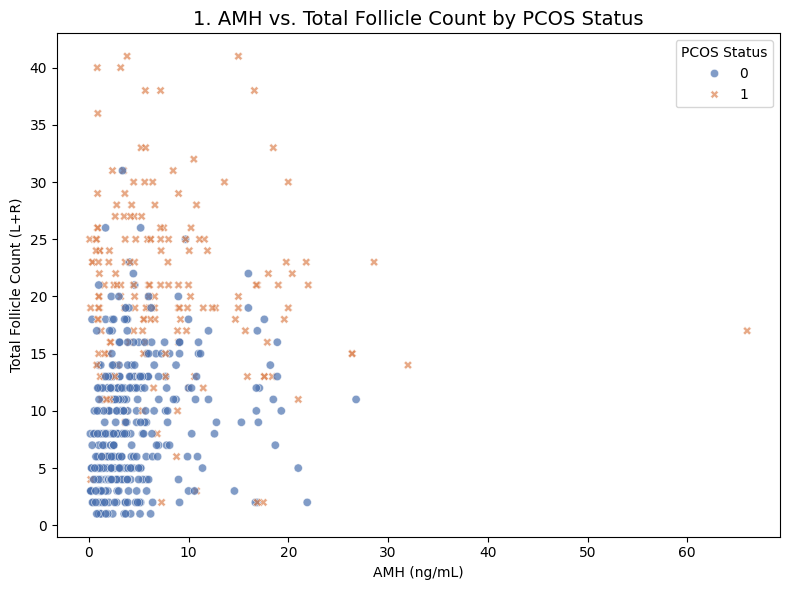

In [ ]:
#Scatter Plot of AMH vs. Total Follicle Count (Interaction of 2 most important features)

# Feature Engineering: Combine Follicle Counts
df['Total_Follicle_Count'] = df['Follicle_No_L'] + df['Follicle_No_R']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='AMHngmL', y='Total_Follicle_Count', hue=TARGET_COL, data=df, style=TARGET_COL, palette='deep', alpha=0.7)
plt.title('1. AMH vs. Total Follicle Count by PCOS Status', fontsize=14)
plt.xlabel('AMH (ng/mL)')
plt.ylabel('Total Follicle Count (L+R)')
plt.legend(title='PCOS Status')
plt.tight_layout()
plt.show()

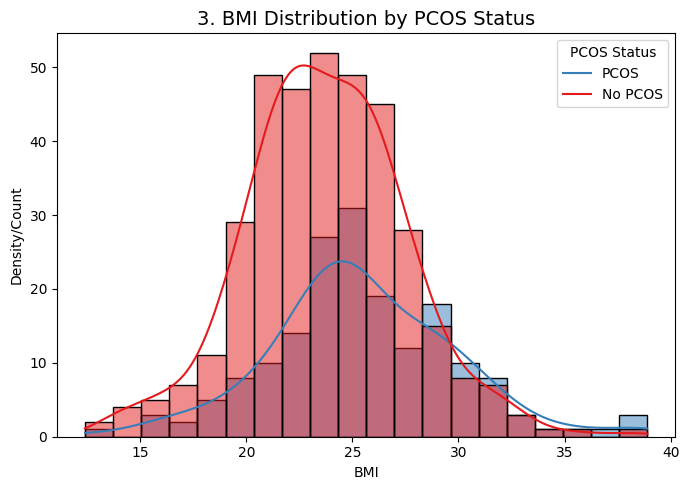

In [ ]:
# Distribution of BMI (Obesity/Metabolic Factor)
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='BMI', hue=TARGET_COL, kde=True, palette='Set1', common_norm=False, bins=20)
plt.title('3. BMI Distribution by PCOS Status', fontsize=14)
plt.xlabel('BMI')
plt.ylabel('Density/Count')
plt.legend(title='PCOS Status', labels=['PCOS', 'No PCOS'])
plt.tight_layout()
plt.show()


/tmp/ipython-input-64313743.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=TARGET_COL, y='WaistHip_Ratio', data=df, palette='viridis')


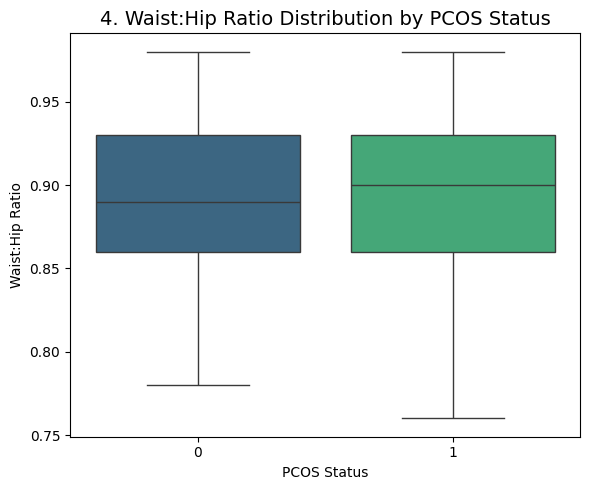

In [ ]:
#Waist:Hip Ratio Distribution (Metabolic Factor)
plt.figure(figsize=(6, 5))
sns.boxplot(x=TARGET_COL, y='WaistHip_Ratio', data=df, palette='viridis')
plt.title('4. Waist:Hip Ratio Distribution by PCOS Status', fontsize=14)
plt.xlabel('PCOS Status')
plt.ylabel('Waist:Hip Ratio')
plt.tight_layout()
plt.show()

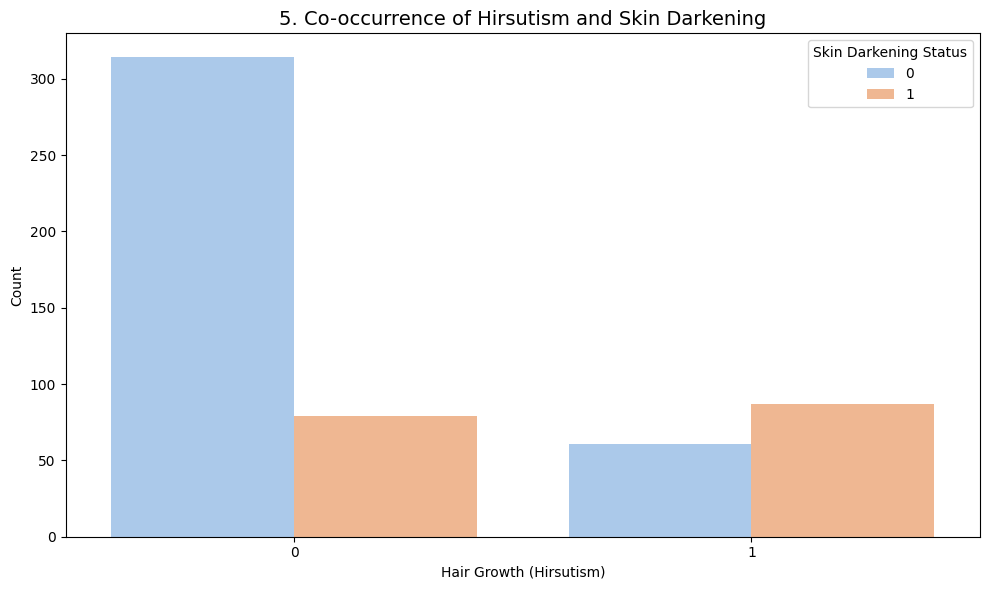

In [ ]:
# Symptom Co-occurrence (Hirsutism vs. Skin Darkening)
plt.figure(figsize=(10, 6))
sns.countplot(x='hair_growthYN', hue='Skin_darkening_YN', data=df, palette='pastel')
plt.title('5. Co-occurrence of Hirsutism and Skin Darkening', fontsize=14)
plt.xlabel('Hair Growth (Hirsutism)')
plt.ylabel('Count')
plt.legend(title='Skin Darkening Status')
plt.tight_layout()
plt.show()

In [ ]:
# High AMH and high Total Follicle Count are the clearest markers separating PCOS patients from others.

# PCOS patients consistently show a high LH:FSH Ratio (above the normal 1.0 threshold).

# The PCOS group tends to have a higher BMI and more fat around the waist.

# Visible symptoms like excessive hair and skin darkening often occur together.

In [ ]:
# Imputation and Coercion
df['Marraige_Status_Yrs'] = df['Marraige_Status_Yrs'].fillna(df['Marraige_Status_Yrs'].median())
df['Fast_food_YN'] = df['Fast_food_YN'].fillna(df['Fast_food_YN'].mode()[0])

for col in COERCE_COLS:
    coerced_series = pd.to_numeric(df[col], errors='coerce')
    mean_val = coerced_series.mean()
    df[col] = coerced_series.fillna(mean_val)

# Feature Engineering
df['LH_FSH_Ratio'] = 1 / df['FSHLH']
df['Total_Follicle_Count'] = df['Follicle_No_L'] + df['Follicle_No_R']


In [ ]:
# Model Training and Evaluation

In [ ]:
X = df.drop(TARGET_COL, axis=1)
y = df[TARGET_COL]

In [ ]:
# FIX: Identify and replace infinite values (caused by 1/0 in LH_FSH_Ratio)
# Replace [inf, -inf] with NaN, then fill NaNs with the column's maximum finite value.
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.max())


In [ ]:
from sklearn.model_selection import train_test_split

# 70% Train, 30% Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Random Forest Classifier
print("Training Random Forest Classifier")
# Use class_weight='balanced' to handle the imbalanced nature of the dataset
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)


Training Random Forest Classifier


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# 4. Model Prediction
y_pred = model.predict(X_test)


In [ ]:
# Model Evaluation
print("\n Model Evaluation ")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report (PCOS Prediction):")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



 Model Evaluation 
Accuracy Score: 0.8957

Classification Report (PCOS Prediction):
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       110
           1       0.86      0.81      0.83        53

    accuracy                           0.90       163
   macro avg       0.89      0.87      0.88       163
weighted avg       0.89      0.90      0.89       163


Confusion Matrix:
[[103   7]
 [ 10  43]]


/tmp/ipython-input-124030989.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_features.values, y=top_10_features.index, palette='magma')


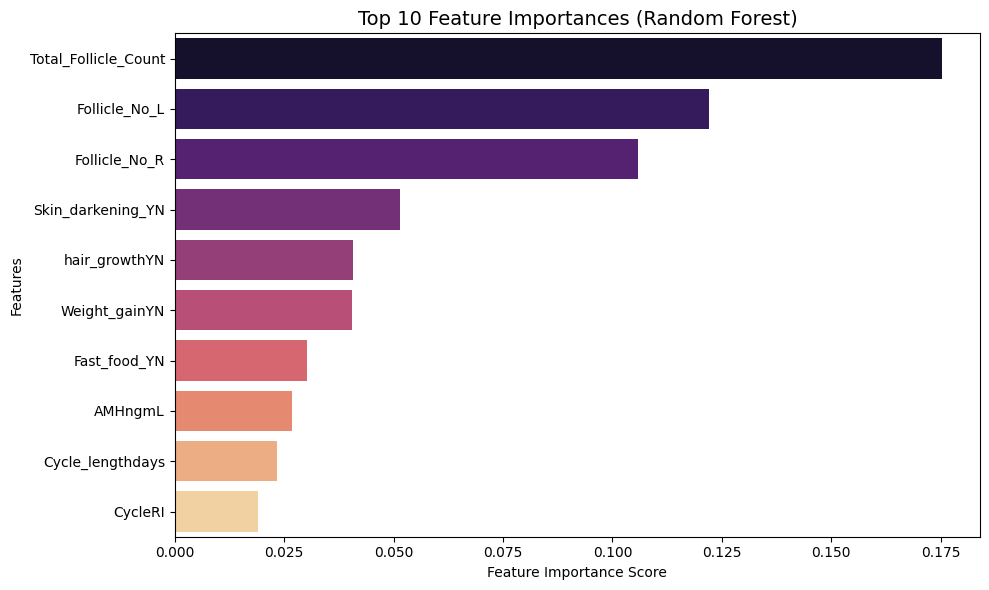

In [ ]:
# Feature Importance Visualization
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
top_10_features = feature_importances.nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features.values, y=top_10_features.index, palette='magma')
plt.title('Top 10 Feature Importances (Random Forest)', fontsize=14)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [ ]:
# The model correctly predicted the patient's status (PCOS or No PCOS) 89.6% of the time.

# When the model predicted a patient had PCOS, it was correct 86% of the time.

# The model successfully identified 81% of all actual PCOS cases in the test set.

# Out of the 53 true PCOS patients, the model only missed 10 cases (False Negatives).

In [ ]:
# Prediction

In [ ]:
import pandas as pd
import numpy as np

new_patient_data = {
    'Age_yrs': 25, 'Weight_Kg': 80.0, 'HeightCm': 165.0, 'BMI': 29.38,
    'Blood_Group': 15, 'Pulse_ratebpm': 78, 'RR_breathsmin': 20,
    'Hbgdl': 10.5, 'CycleRI': 2, 'Cycle_lengthdays': 5,
    'Marraige_Status_Yrs': 5.0, 'PregnantYN': 0, 'No_of_abortions': 0,
    'I_betaHCGmIUmL': 1.99, 'II_betaHCGmIUmL': 1.99,
    'FSHmIUmL': 3.5, 'LHmIUmL': 15.75, 'FSHLH': 0.22,
    'Hipinch': 42, 'Waistinch': 38, 'WaistHip_Ratio': 0.90,
    'TSH_mIUL': 2.5, 'AMHngmL': 10.5,
    'PRLngmL': 18.0, 'Vit_D3_ngmL': 25.0, 'PRGngmL': 0.3,
    'RBSmgdl': 85, 'Weight_gainYN': 1, 'hair_growthYN': 1,
    'Skin_darkening_YN': 1, 'Hair_lossYN': 1, 'PimplesYN': 1,
    'Fast_food_YN': 1, 'RegExerciseYN': 0, 'BP_Systolic_mmHg': 120,
    'BP_Diastolic_mmHg': 80, 'Follicle_No_L': 18, 'Follicle_No_R': 22,
    'Avg_F_size_L_mm': 8.0, 'Avg_F_size_R_mm': 7.5, 'Endometrium_mm': 6.5
}
new_data = pd.DataFrame([new_patient_data])

new_data['LH_FSH_Ratio'] = 1 / new_data['FSHLH']
new_data['Total_Follicle_Count'] = new_data['Follicle_No_L'] + new_data['Follicle_No_R']

new_data = new_data.replace([np.inf, -np.inf], np.nan)
new_data = new_data.fillna(0)


new_data_ordered = new_data[model.feature_names_in_]

prediction = model.predict(new_data_ordered)
probability = model.predict_proba(new_data_ordered)

status = 'PCOS' if prediction[0] == 1 else 'No PCOS'
pcos_prob = probability[0][1] * 100

print(f"\n Prediction for New Patient ")
print(f"Predicted Status (0=No PCOS, 1=PCOS): {prediction[0]}")
print(f"Predicted Status (Interpreted): {status}")
print(f"Confidence (Probability of PCOS): {pcos_prob:.2f}%")


 Prediction for New Patient 
Predicted Status (0=No PCOS, 1=PCOS): 1
Predicted Status (Interpreted): PCOS
Confidence (Probability of PCOS): 94.00%


In [ ]:
#Predicted Status: PCOS (Class 1)

#Confidence: 94.00%

#This result confirms that the patient's specific combination of features
#(likely very high AMH and Follicle Count, and a low FSH/LH ratio) is strongly indicative of the PCOS diagnosis
#according to the model's learned patterns.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Accuracy: 0.8466
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       110
           1       0.73      0.85      0.78        53

    accuracy                           0.85       163
   macro avg       0.82      0.85      0.83       163
weighted avg       0.86      0.85      0.85       163

[[93 17]
 [ 8 45]]

Decision Tree Accuracy: 0.7853
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       110
           1       0.67      0.66      0.67        53

    accuracy                           0.79       163
   macro avg       0.76      0.75      0.75       163
weighted avg       0.78      0.79      0.78       163

[[93 17]
 [18 35]]

KNN Accuracy: 0.7546
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       110
           1       0.68      0.47      0.56        53

    accuracy                           0.75       16

/tmp/ipython-input-2298586638.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Accuracy', y='Model', palette='viridis')


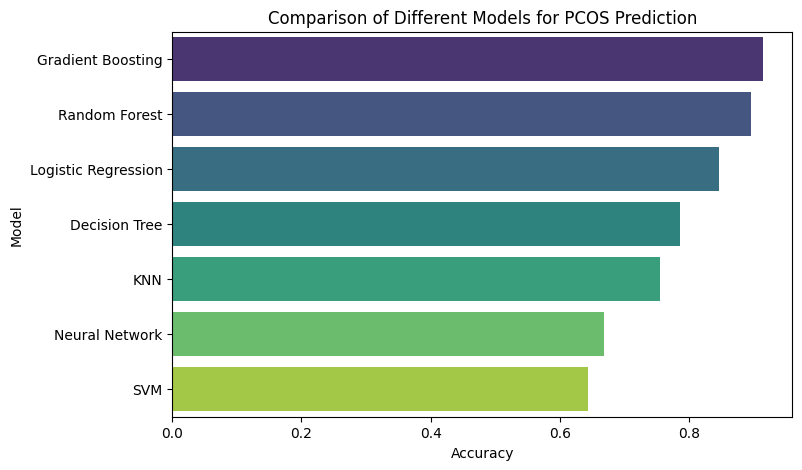

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define all models including Random Forest
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', class_weight='balanced', probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
}

# Store results
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))

    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

# Create DataFrame for comparison
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)
print("\n=== Model Comparison ===")
print(results_df)

# Optional: Plot accuracy comparison
plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x='Accuracy', y='Model', palette='viridis')
plt.title('Comparison of Different Models for PCOS Prediction')
plt.show()



/tmp/ipython-input-206430827.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


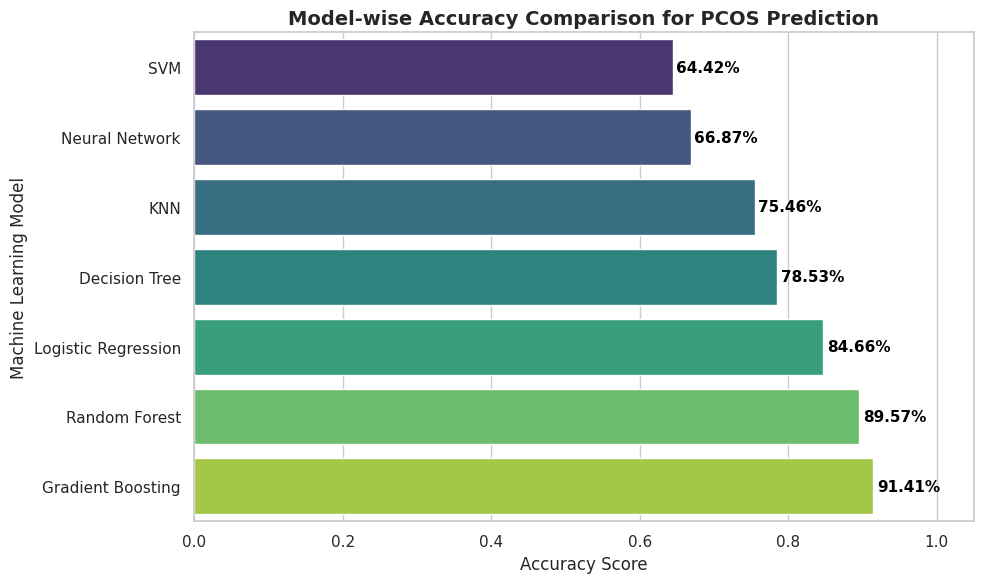

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.set(style="whitegrid")

# Sort by accuracy for nice ordering
results_df = results_df.sort_values(by="Accuracy", ascending=True)

# Barplot with gradient colors
ax = sns.barplot(
    data=results_df,
    x='Accuracy',
    y='Model',
    palette='viridis'
)

# Add value labels on bars
for i, (acc) in enumerate(results_df['Accuracy']):
    ax.text(acc + 0.005, i, f"{acc*100:.2f}%", color='black', va='center', fontsize=11, fontweight='bold')

# Aesthetics
plt.title('Model-wise Accuracy Comparison for PCOS Prediction', fontsize=14, fontweight='bold')
plt.xlabel('Accuracy Score', fontsize=12)
plt.ylabel('Machine Learning Model', fontsize=12)
plt.xlim(0, 1.05)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    cv_score = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
    print(f"{name} Cross-Validation Accuracy: {cv_score:.4f}")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Cross-Validation Accuracy: 0.8336
Decision Tree Cross-Validation Accuracy: 0.8059
KNN Cross-Validation Accuracy: 0.6876
SVM Cross-Validation Accuracy: 0.6340
Random Forest Cross-Validation Accuracy: 0.8854
Gradient Boosting Cross-Validation Accuracy: 0.8705
Neural Network Cross-Validation Accuracy: 0.7654


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

best_model = GradientBoostingClassifier(random_state=42)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Gradient Boosting Accuracy: 0.9141104294478528

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       110
           1       0.91      0.81      0.86        53

    accuracy                           0.91       163
   macro avg       0.91      0.89      0.90       163
weighted avg       0.91      0.91      0.91       163

Confusion Matrix:
 [[106   4]
 [ 10  43]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

# Assuming you already trained this earlier:
# best_model = GradientBoostingClassifier(random_state=42)
# best_model.fit(X_train, y_train)

# ---- New Patient Data ----
new_patient_data = {
    'Age_yrs': 25, 'Weight_Kg': 80.0, 'HeightCm': 165.0, 'BMI': 29.38,
    'Blood_Group': 15, 'Pulse_ratebpm': 78, 'RR_breathsmin': 20,
    'Hbgdl': 10.5, 'CycleRI': 2, 'Cycle_lengthdays': 5,
    'Marraige_Status_Yrs': 5.0, 'PregnantYN': 0, 'No_of_abortions': 0,
    'I_betaHCGmIUmL': 1.99, 'II_betaHCGmIUmL': 1.99,
    'FSHmIUmL': 3.5, 'LHmIUmL': 15.75, 'FSHLH': 0.22,
    'Hipinch': 42, 'Waistinch': 38, 'WaistHip_Ratio': 0.90,
    'TSH_mIUL': 2.5, 'AMHngmL': 10.5,
    'PRLngmL': 18.0, 'Vit_D3_ngmL': 25.0, 'PRGngmL': 0.3,
    'RBSmgdl': 85, 'Weight_gainYN': 1, 'hair_growthYN': 1,
    'Skin_darkening_YN': 1, 'Hair_lossYN': 1, 'PimplesYN': 1,
    'Fast_food_YN': 1, 'RegExerciseYN': 0, 'BP_Systolic_mmHg': 120,
    'BP_Diastolic_mmHg': 80, 'Follicle_No_L': 18, 'Follicle_No_R': 22,
    'Avg_F_size_L_mm': 8.0, 'Avg_F_size_R_mm': 7.5, 'Endometrium_mm': 6.5
}

new_data = pd.DataFrame([new_patient_data])

# ---- Derived Features ----
new_data['LH_FSH_Ratio'] = 1 / new_data['FSHLH']
new_data['Total_Follicle_Count'] = new_data['Follicle_No_L'] + new_data['Follicle_No_R']

# Handle missing/infinite values
new_data = new_data.replace([np.inf, -np.inf], np.nan)
new_data = new_data.fillna(0)

# Ensure correct feature order as per the trained Gradient Boosting model
new_data_ordered = new_data[best_model.feature_names_in_]

# ---- Prediction ----
prediction = best_model.predict(new_data_ordered)
probability = best_model.predict_proba(new_data_ordered)

status = 'PCOS' if prediction[0] == 1 else 'No PCOS'
pcos_prob = probability[0][1] * 100

print(f"\n--- Prediction for New Patient ---")
print(f"Predicted Status (0=No PCOS, 1=PCOS): {prediction[0]}")
print(f"Predicted Status (Interpreted): {status}")
print(f"Confidence (Probability of PCOS): {pcos_prob:.2f}%")



--- Prediction for New Patient ---
Predicted Status (0=No PCOS, 1=PCOS): 1
Predicted Status (Interpreted): PCOS
Confidence (Probability of PCOS): 99.79%


/tmp/ipython-input-2112687125.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=cv_results, x="CV_Accuracy", y="Model", palette="mako")


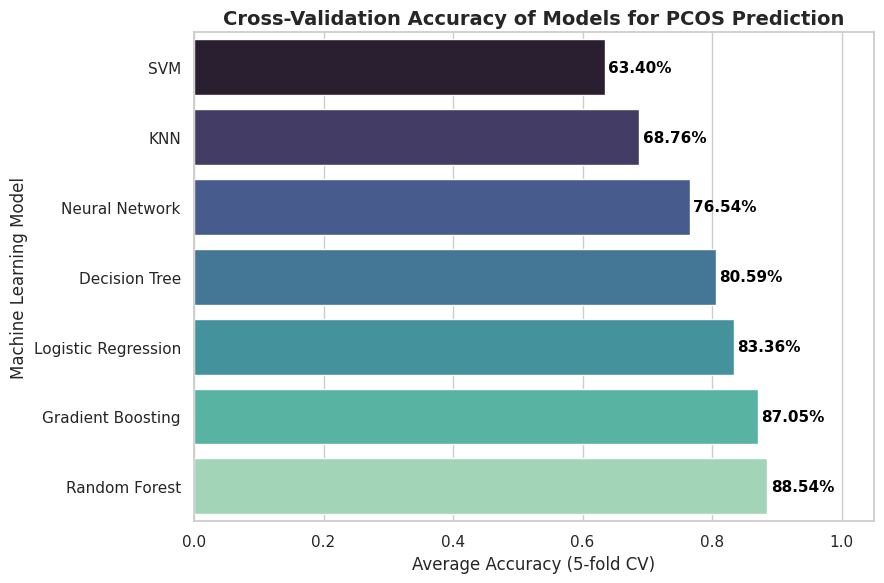

In [ ]:
plt.figure(figsize=(9,6))
sns.set(style="whitegrid")
cv_results = pd.DataFrame({
    "Model": ["Random Forest", "Gradient Boosting", "Logistic Regression", "Decision Tree", "Neural Network", "KNN", "SVM"],
    "CV_Accuracy": [0.8854, 0.8705, 0.8336, 0.8059, 0.7654, 0.6876, 0.6340]
}).sort_values(by="CV_Accuracy", ascending=True)

ax = sns.barplot(data=cv_results, x="CV_Accuracy", y="Model", palette="mako")

for i, acc in enumerate(cv_results["CV_Accuracy"]):
    ax.text(acc + 0.005, i, f"{acc*100:.2f}%", color='black', va='center', fontsize=11, fontweight='bold')

plt.title("Cross-Validation Accuracy of Models for PCOS Prediction", fontsize=14, fontweight='bold')
plt.xlabel("Average Accuracy (5-fold CV)", fontsize=12)
plt.ylabel("Machine Learning Model", fontsize=12)
plt.xlim(0, 1.05)
plt.tight_layout()
plt.show()


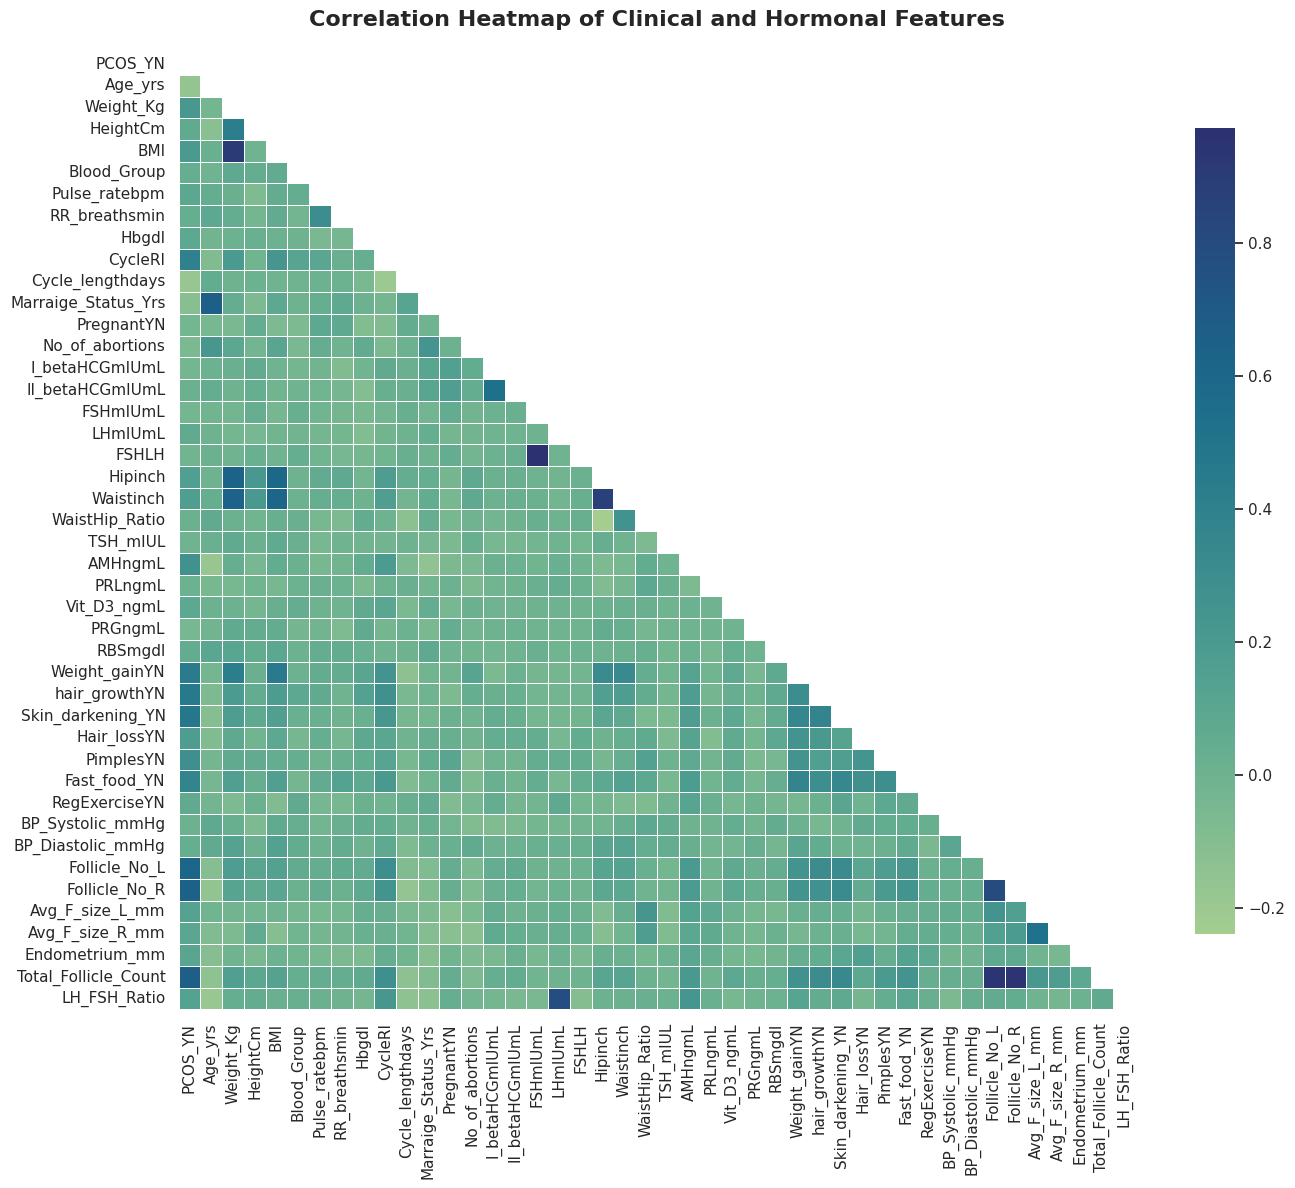

In [ ]:
plt.figure(figsize=(14, 12))
sns.set(style="white")

corr = df.corr()

# Mask the upper triangle for a cleaner look
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    corr,
    mask=mask,
    cmap="crest",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
)
plt.title("Correlation Heatmap of Clinical and Hormonal Features", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1484916252.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette=colors, linewidth=1.5, edgecolor='black')


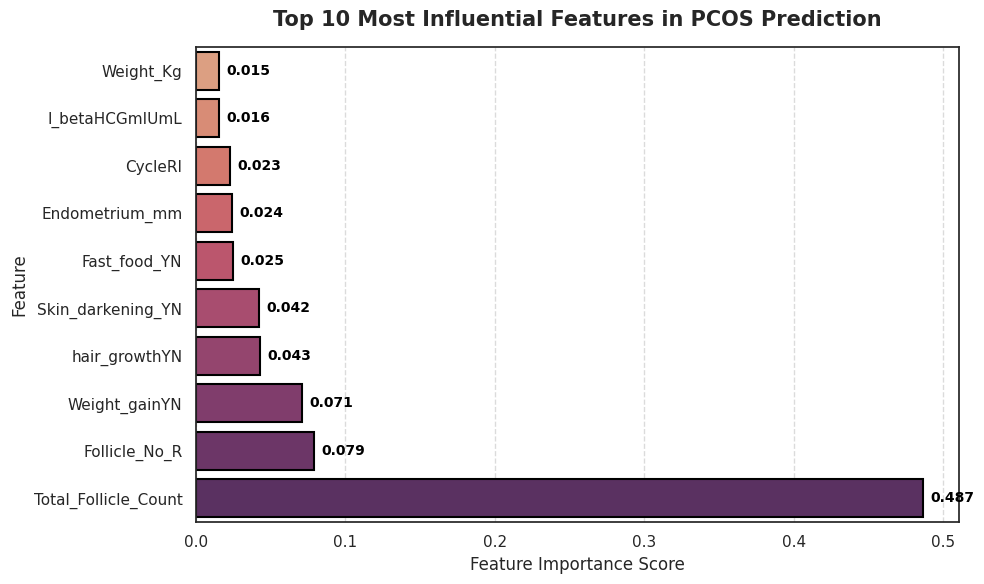

In [ ]:
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
top_features = feature_importances.nlargest(10).sort_values()

plt.figure(figsize=(10,6))
colors = sns.color_palette("flare", n_colors=10)

sns.barplot(x=top_features.values, y=top_features.index, palette=colors, linewidth=1.5, edgecolor='black')
plt.title("Top 10 Most Influential Features in PCOS Prediction", fontsize=15, fontweight='bold', pad=15)
plt.xlabel("Feature Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)

# Add labels
for value, name in zip(top_features.values, top_features.index):
    plt.text(value + 0.005, name, f"{value:.3f}", color='black', va='center', fontsize=10, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


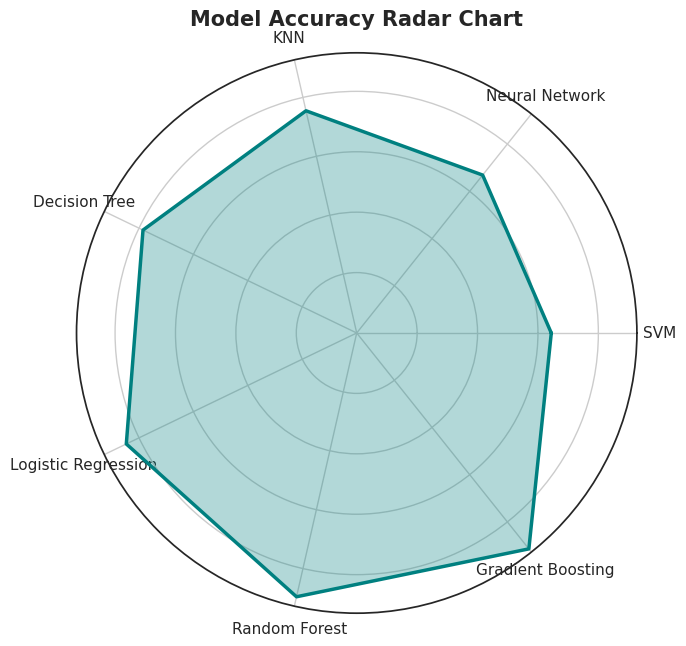

In [ ]:
import numpy as np

# Prepare data
models = results_df['Model'].tolist()
accuracies = results_df['Accuracy'].tolist()

angles = np.linspace(0, 2*np.pi, len(models), endpoint=False).tolist()
accuracies += accuracies[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(7,7), subplot_kw=dict(polar=True))
ax.plot(angles, accuracies, color='teal', linewidth=2.5)
ax.fill(angles, accuracies, color='teal', alpha=0.3)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(models, fontsize=11)
ax.set_title("Model Accuracy Radar Chart", fontsize=15, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


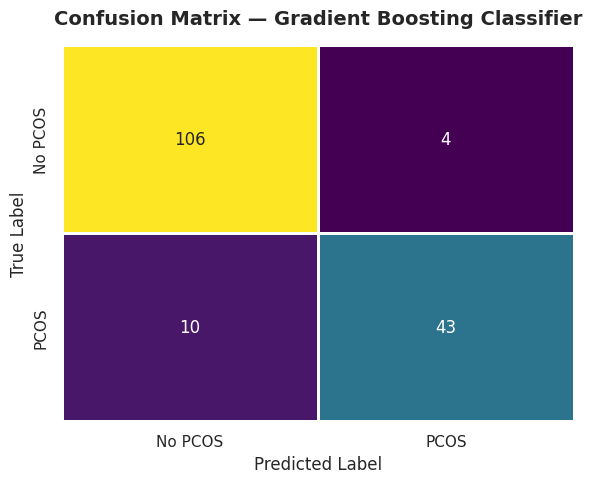

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_model.predict(X_test))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", cbar=False, linewidths=1, linecolor='white')
plt.title("Confusion Matrix — Gradient Boosting Classifier", fontsize=14, fontweight='bold', pad=15)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.xticks([0.5,1.5], ["No PCOS", "PCOS"], fontsize=11)
plt.yticks([0.5,1.5], ["No PCOS", "PCOS"], fontsize=11)
plt.tight_layout()
plt.show()


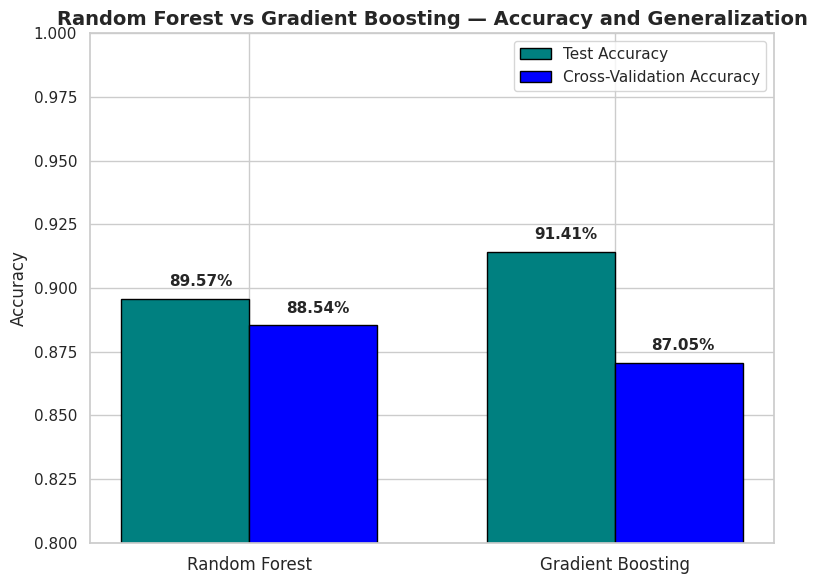

In [ ]:
performance_df = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting'],
    'Test Accuracy': [0.8957, 0.9141],
    'Cross-Validation Accuracy': [0.8854, 0.8705]
})

plt.figure(figsize=(8,6))
sns.set(style="whitegrid")

bar_width = 0.35
x = np.arange(len(performance_df['Model']))

plt.bar(x - bar_width/2, performance_df['Test Accuracy'], bar_width, label='Test Accuracy', color='teal', edgecolor='black')
plt.bar(x + bar_width/2, performance_df['Cross-Validation Accuracy'], bar_width, label='Cross-Validation Accuracy', color='blue', edgecolor='black')

# Annotate bars
for i in range(len(performance_df)):
    plt.text(x[i] - 0.22, performance_df['Test Accuracy'][i] + 0.005, f"{performance_df['Test Accuracy'][i]*100:.2f}%", fontsize=11, fontweight='bold')
    plt.text(x[i] + 0.10, performance_df['Cross-Validation Accuracy'][i] + 0.005, f"{performance_df['Cross-Validation Accuracy'][i]*100:.2f}%", fontsize=11, fontweight='bold')

plt.xticks(x, performance_df['Model'], fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Random Forest vs Gradient Boosting — Accuracy and Generalization', fontsize=14, fontweight='bold')
plt.legend()
plt.ylim(0.8, 1.0)
plt.tight_layout()
plt.show()
